## **Q1. Write the code of the following programs in Python language**


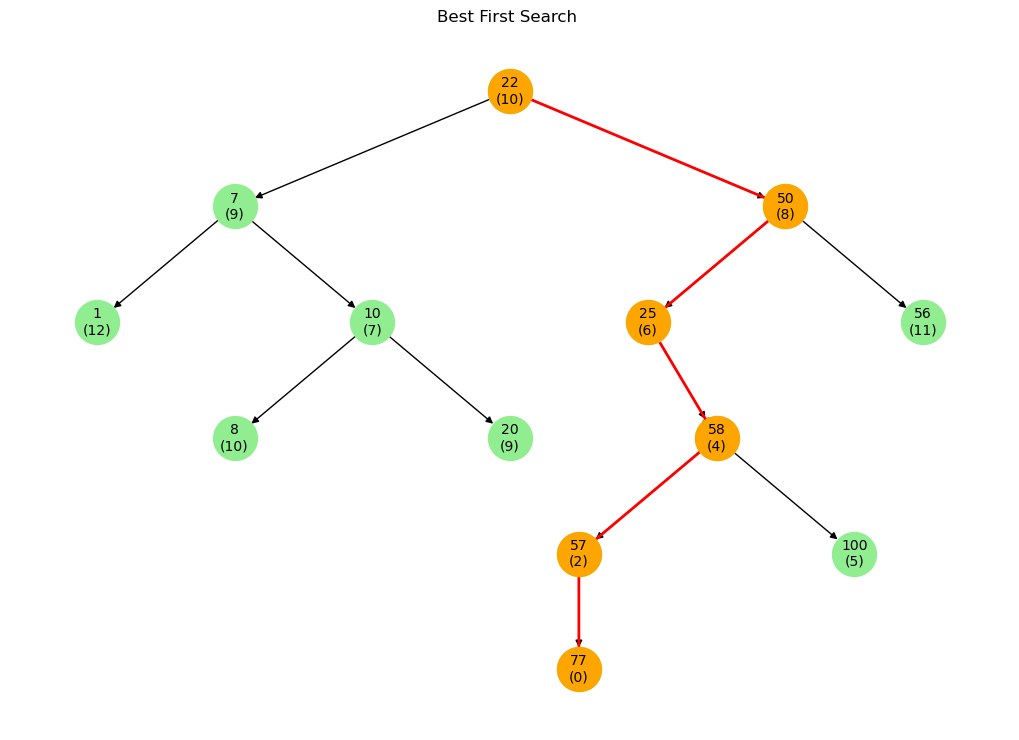

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph()
graph.add_edges_from([
    ('22', '7'), ('22', '50'),
    ('7', '1'), ('7', '10'),
    ('10', '8'), ('10', '20'),
    ('50', '25'), ('50', '56'),
    ('25', '58'),
    ('58', '57'), ('58', '100'),
    ('57', '77')
])

heuristics = {
    '22': 10,
    '7': 9,
    '50': 8,
    '1': 12,
    '10': 7,
    '25': 6,
    '56': 11,
    '8': 10,
    '20': 9,
    '58': 4,
    '57': 2,
    '100': 5,
    '77': 0
}

def best_first_search(graph, start_node, goal_node, heuristics):
    visited_nodes = []
    node_queue = [(start_node, [start_node])]

    while node_queue:
        current_node, path_so_far = node_queue.pop(0)
        visited_nodes.append(current_node)

        if current_node == goal_node:
            return path_so_far
        neighbors = sorted(graph.neighbors(current_node), key=lambda x: heuristics[x])
        for neighbor in neighbors:
            if neighbor not in visited_nodes:
                node_queue.append((neighbor, path_so_far + [neighbor]))
    return None  
start = '22'
goal = '77'
best_path = best_first_search(graph, start, goal, heuristics)

positions = {
    '22': (0, 5),
    '7': (-2, 4), '50': (2, 4),
    '1': (-3, 3), '10': (-1, 3),
    '8': (-2, 2), '20': (0, 2),
    '25': (1, 3), '56': (3, 3),
    '58': (1.5, 2), '100': (2.5, 1), '57': (0.5, 1),
    '77': (0.5, 0)
}

plt.figure(figsize=(10, 7))
nx.draw(graph, positions, with_labels=False, node_size=1000, node_color='lightgreen', arrows=True)

node_labels = {node: f"{node}\n({heuristics[node]})" for node in graph.nodes()}
nx.draw_networkx_labels(graph, positions, labels=node_labels, font_size=10)

if best_path:
    nx.draw_networkx_nodes(graph, positions, nodelist=best_path, node_color='orange', node_size=1000)
    path_edges = [(best_path[i], best_path[i + 1]) for i in range(len(best_path) - 1)]
    nx.draw_networkx_edges(graph, positions, edgelist=path_edges, edge_color='red', width=2)

plt.title("Best First Search ")
plt.axis('off')
plt.show()